In [219]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [328]:
df = pd.read_csv('Ecommerce Customers.csv')

In [329]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [330]:
# Drop features that do not relate to yearly amount spent
df = df.drop(['Email', 'Address', 'Avatar'], axis=1)

In [331]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5)
memory usage: 19.6 KB


In [333]:
# convert the dataframe to array to be easier to use in the forloo
df_x = df.values
# exclude the dependent variable
df_x = df_x[:,0:-1]
df_y = df['Yearly Amount Spent'].values

In [334]:
df_x[0:10]

array([[ 34.49726773,  12.65565115,  39.57766802,   4.08262063],
       [ 31.92627203,  11.10946073,  37.26895887,   2.66403418],
       [ 33.00091476,  11.33027806,  37.11059744,   4.1045432 ],
       [ 34.30555663,  13.71751367,  36.72128268,   3.12017878],
       [ 33.33067252,  12.79518855,  37.5366533 ,   4.44630832],
       [ 33.87103788,  12.02692534,  34.47687763,   5.4935072 ],
       [ 32.0215955 ,  11.36634831,  36.68377615,   4.68501725],
       [ 32.73914294,  12.35195897,  37.37335886,   4.43427343],
       [ 33.9877729 ,  13.38623528,  37.53449734,   3.27343358],
       [ 31.93654862,  11.81412829,  37.14516822,   3.20280607]])

In [335]:
df_y[0:10]

array([ 587.95105397,  392.20493344,  487.54750487,  581.85234404,
        599.40609205,  637.10244792,  521.57217476,  549.90414611,
        570.20040896,  427.1993849 ])

In [343]:
# minimize the parameters 

def minimize_m_b(data_x, data_y, b0, b, learning_rate):
    minimize_b0 = b0
    minimize_b =  b
    sum_of_bx =0.0
    N = float(len(data_x))
    
    for i in range(len(data_x)):
        y = data_y[i]
        
        for x in range(1,len(data_x[0])):
            sum_of_bx += b[x] * data_x[i][x] # sum up b1*x1 + b2*x2 +...xn*bn
            
        minimize_b0 += (1/N)*( (b0 + sum_of_bx) - y) # where x0=1
        
        for j in range(1, len(data_x[0])): # start from 1 is because x0 is just 1 (m*x0 + b1*x1 + b2*x2...
            minimize_b[j] += (1/N)*( (b0 + sum_of_bx) - y) * x[j] # x[] is the result after each partial derivative wrt b
        
    minimized_b0 = b0 - learning_rate * minimize_b0
    
    for x in range(1, len(data_x[0])):
        minimized_b[x] = b[x] - learning_rate * minimize_b[x]
        
    return [minimized_b0, minimized_b]

In [344]:

def run_minimize_m_b(data_x, data_y, init_b0, init_b, learning_rate, num_iteration):
    b0 = init_b0
    b = init_b
    for i in range(num_iteration):
        b0, b = minimize_m_b(data_x, data_y, b0, b, learning_rate)
    return [b0, b]
    

In [345]:
def Run():
    data_x = df_x
    data_y = df_y
    learning_rate = 0.0001
    num_iteration = 500
    
    # set initial bs to 0s
    init_b0 = 0
    init_b = []
    for x in range(len(data_x[0])):
        init_b.append(int(0))
        
    b0, b = run_minimize_m_b(data_x, data_y, init_b0, init_b, learning_rate, num_iteration)
    print ("intercept: ",b0, "Slope: ",b)


In [346]:
if __name__ == '__main__':
    Run()

TypeError: 'int' object is not subscriptable

In [355]:
qa=[1,2,3]

In [356]:
print(qa)

[1, 2, 3]


In [60]:
# Now lets try to use sklearn

In [138]:
X = df['Time on App']
y = df['Yearly Amount Spent']

In [139]:
X.shape

(500,)

In [140]:
X = X.values.reshape(-1,1)

In [141]:
X.shape

(500, 1)

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [144]:
from sklearn.linear_model import LinearRegression

In [145]:
lrm = LinearRegression()

In [146]:
lrm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [147]:
pred_lrm = lrm.predict(X_test)

In [148]:
from sklearn import metrics
metrics.r2_score(y_test, pred_lrm)

0.18822882786775508

Text(0,0.5,'residual')

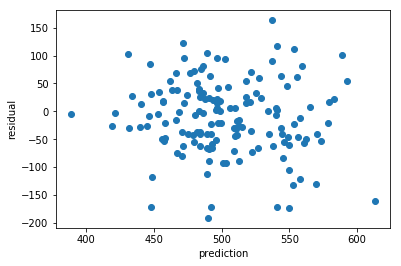

In [149]:
plt.scatter(pred_lrm,y_test-pred_lrm)
plt.xlabel('prediction')
plt.ylabel('residual')

In [150]:
lrm.coef_

array([ 41.64584878])

In [ ]:
# 1 unit increase in time spent on app will result in 41 yearly spent

In [110]:
i1, i2 = map(int, input().split())

for x in range(i1, i2):
    if(x>1):
        for y in range(2,x):
            if(x%y==0):
                break
        else:
            print(x)

20 30
23
29
